# AULA 5
### CADERNO DE ANÁLISE EXPLORATÓRIA DE DADOS DO DATASUS (ATENDIMENTO)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib import cm

### Code abaixo para voltar ao ponto que paramos na aula 3

In [2]:
dados = pd.read_csv("csvs\\datasus_local_internacao_atendimento.csv", encoding = "utf-8", skiprows = 3, sep = ";", 
                    skipfooter = 10, engine = 'python', decimal=",")

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")

usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
UFS = usaveis.index.tolist()
codigos = [uf[0:2] for uf in UFS]
regioes = []

for i in range(len(codigos)):
    if codigos[i][0] == '1':
        regioes.append("Norte")
    if codigos[i][0] == '2':
        regioes.append("Nordeste")
    if codigos[i][0] == '3':
        regioes.append("Sudeste")
    if codigos[i][0] == '4':
        regioes.append("Sul")
    if codigos[i][0] == '5':
        regioes.append("Centro-Oeste")
usaveis.insert(loc=0, column="Região", value=regioes)

usaveis_ord_total = usaveis.sort_values("Total", ascending = False)
usaveis_ord_total = usaveis_ord_total.drop("Total", axis = 1)
usaveis =  usaveis.drop("Total", axis = 1)

pd.options.display.float_format = "{:.2f}".format 

def millions(x, pos):
    return f'R$ {int(x/1000000)}M'

Podemos fazer slice nas colunas utilizando df[df.columns[:]]

In [3]:
ultimo_mes_valido = usaveis_ord_total[usaveis_ord_total.columns[-2]]

Text(0.5, 1.0, 'Demonstração do gráfico em Pizza')

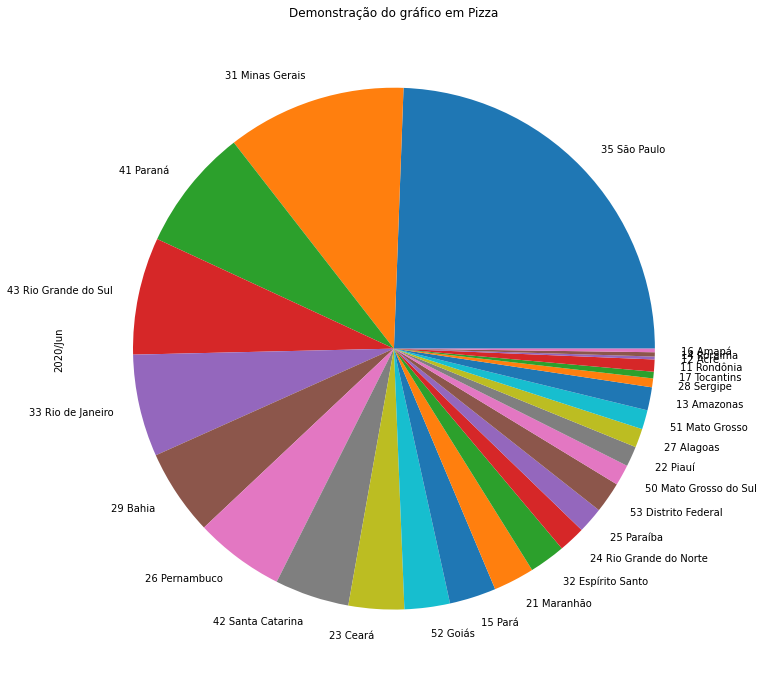

In [4]:
ultimo_mes_valido.plot(kind='pie', figsize = (12,12))
plt.title("Demonstração do gráfico em Pizza")

### Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

Venho utilizando nos últimos gráficos com o plt.grid().

### Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

In [5]:
gastos_func_RS = ultimo_mes_valido/ultimo_mes_valido.loc['43 Rio Grande do Sul']

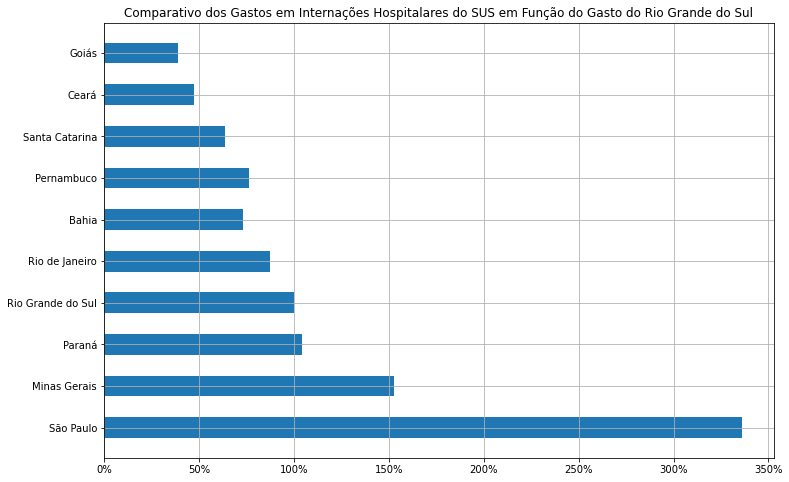

In [6]:
gastos_func_RS = gastos_func_RS.head(10)

ufs = gastos_func_RS.index.tolist()
ufs = [uf[3:] for uf in ufs]
ufs_pos = np.arange(len(ufs))

# Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(ufs_pos, gastos_func_RS, 0.5)
ax.grid()
plt.title('Comparativo dos Gastos em Internações Hospitalares do SUS em Função do Gasto do Rio Grande do Sul')

# Para Y axis
ax.set_yticks(ufs_pos)
ax.set_yticklabels(ufs)

formatterx = ticker.PercentFormatter(xmax=1)
ax.xaxis.set_major_formatter(formatterx)

### Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

Inicialmente, procurei por uma base de dados com a população estimada de cada UF no Brasil. Abaixo, segue a limpeza e a normalização do dataset para poder ser inserido como uma coluna para o dataframe 'usaveis'

In [7]:
populacao = pd.read_excel("csvs\\populacao.xls", skiprows=1, skipfooter=7)
populacao.head(5)

,BRASIL E UNIDADES DA FEDERAÇÃO,Unnamed: 1,POPULAÇÃO ESTIMADA
0,Brasil,nan,211755692
1,Região Norte,nan,18672591
2,Rondônia,nan,1796460
3,Acre,nan,894470
4,Amazonas,nan,4207714


In [8]:
populacao.drop('Unnamed: 1', axis='columns', inplace=True)

In [9]:
populacao.rename(columns={'BRASIL E UNIDADES DA FEDERAÇÃO': 'local', 'POPULAÇÃO ESTIMADA':'populacao'}, inplace=True)
populacao.set_index('local', inplace=True)

In [10]:
#removendo parenteses e pontos
populacao.populacao.replace(r"(\(\d*\))?", "", regex=True, inplace=True)
populacao.populacao.replace(r"\.", "", regex=True, inplace=True)

In [11]:
populacao = pd.to_numeric(populacao.populacao, errors='ignore')

In [12]:
populacao.drop(['Brasil', 'Região Norte', 'Região Nordeste', 'Região Sudeste', 'Região Sul', 'Região Centro-Oeste'], 
               inplace = True)
ufs = populacao.index.tolist()
pop = populacao.tolist()

In [13]:
usaveis.insert(loc=1, column='populacao', value=pop)

In [14]:
usaveis.head(5)

,Região,populacao,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,1796460,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,...,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,Norte,894470,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,...,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,Norte,4207714,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,...,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,Norte,631181,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,...,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41
15 Pará,Norte,8690745,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,...,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51


Com isso, podemos fazer o cálculo do gasto mensal/pop dos UFs e plotar para verificar. Inicialmente, plotarei um gráfico de barras para poder olhar a lista dos estados como um todo.

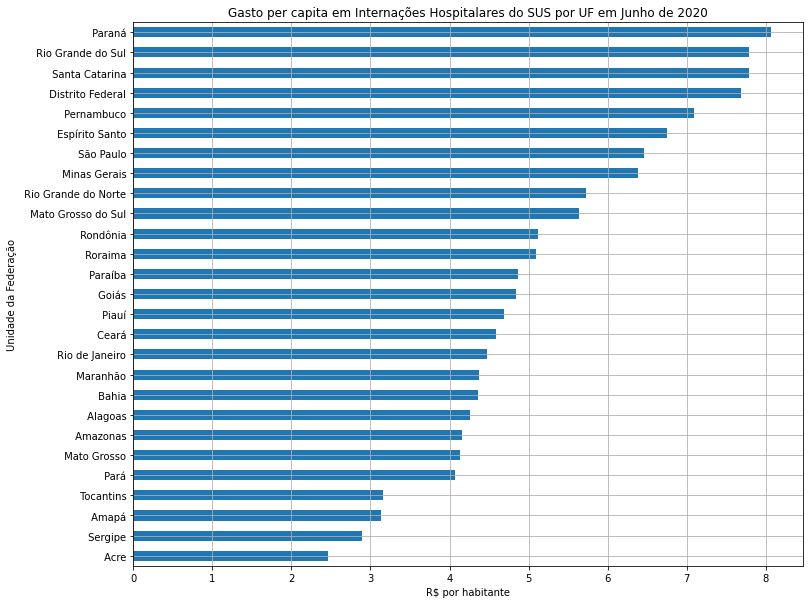

In [15]:
gasto_per_capita = (usaveis['2020/Jun']/usaveis.populacao).sort_values(ascending=True)
yticks = [uf[2:] for uf in gasto_per_capita.index.tolist()]

ax = gasto_per_capita.plot(kind='barh',figsize=(12,10))
plt.title('Gasto per capita em Internações Hospitalares do SUS por UF em Junho de 2020')
ax.set_xlabel('R$ por habitante')
ax.set_yticklabels(yticks)

plt.grid()

</br>

Para trabalhar com algo mais visual e observar as diferenças entre os estados mais gastadores (gasto total) por um scatter plot, com o eixo x contendo os gastos mensais (Junho) totais e no eixo y o número de habitantes do estado. Utilizarei o gasto per capita para definir o tamanho de cada ponto.



In [16]:
# seleciono o top 5 gastadores, os gastos, a populacao e calculo o gasto percapita de cada um deles 
usaveis_top5 = usaveis.sort_values(by = '2020/Jun', ascending = False).head(5)
ultimo_mes_valido = usaveis_top5[usaveis_top5.columns[-2]]
gastos_jun2020 = ultimo_mes_valido/1000000
populacao = usaveis_top5.populacao/1000000
gastos_per_capita_top5 = (ultimo_mes_valido/usaveis_top5.populacao).tolist()

colors = ['red', 'blue', 'yellow', 'green', 'cyan']

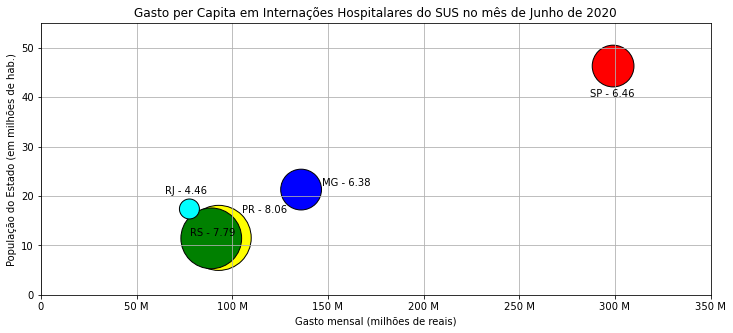

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)

#definindo o tamanho dos pontos
size = np.array(gastos_per_capita_top5)
size = size ** 4

#gerando a plot
ax = ax.scatter(gastos_jun2020, populacao, s = size, edgecolors= 'black', c = colors)

# fugindo das mas praticas
plt.ylim(0, 55)
plt.xlim(0, 350)

# customizacao
plt.xlabel('Gasto mensal (milhões de reais)')
plt.ylabel('População do Estado (em milhões de hab.)')
plt.title('Gasto per Capita em Internações Hospitalares do SUS no mês de Junho de 2020')
plt.text(287, 40, 'SP - 6.46')
plt.text(147, 22, 'MG - 6.38')
plt.text(105, 16.5, 'PR - 8.06')
plt.text(78, 12, 'RS - 7.79')
plt.text(65, 20.5, 'RJ - 4.46')
ax = plt.xticks([0, 50, 100, 150, 200, 250, 300, 350],['0', '50 M', '100 M', '150 M', '200 M', '250 M', '300 M', '350 M'])
plt.grid()


Podemos verificar que existe, óbviamente, uma relação linear entre o número de habitantes e o gasto mensal total. É possível observar que a região sul gasta mais por habitante que as outras regiões, mesmo que o gasto total seja menor. 

É importante notar que a renda per capita e a arrecadação per capita dos estados do Sudeste também são maiores que a dos estados sulistas.

Um dos pontos surpreendentes do gráfico é o do Rio de Janeiro, com a média de gasto por habitante bem menor que os outros estados em sua região. Ao pesquisar mais sobre o assunto, verificamos a existência de diversos [artigos científicos](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S1413-81232019001204555) e [notícias](https://oglobo.globo.com/rio/prefeitura-do-rio-deixou-de-investir-22-bilhoes-em-saude-em-tres-anos-24107575) sobre a falta de investimento na área. Válido também apontar que o índice de desigualdade social do RJ é o maior entre os estados do Sudeste, outra possível causa para o valor apontado no gráfico acima.

In [18]:
(usaveis['2020/Jun']/usaveis.populacao).sort_values(ascending = False)

Unidade da Federação
41 Paraná                8.07
43 Rio Grande do Sul     7.79
42 Santa Catarina        7.79
53 Distrito Federal      7.69
26 Pernambuco            7.09
32 Espírito Santo        6.75
35 São Paulo             6.46
31 Minas Gerais          6.39
24 Rio Grande do Norte   5.72
50 Mato Grosso do Sul    5.64
11 Rondônia              5.12
14 Roraima               5.10
25 Paraíba               4.87
52 Goiás                 4.84
22 Piauí                 4.69
23 Ceará                 4.59
33 Rio de Janeiro        4.47
21 Maranhão              4.38
29 Bahia                 4.36
27 Alagoas               4.26
13 Amazonas              4.16
51 Mato Grosso           4.14
15 Pará                  4.07
17 Tocantins             3.16
16 Amapá                 3.13
28 Sergipe               2.89
12 Acre                  2.46
dtype: float64

In [19]:
usaveis['2020/Jun'].sort_values(ascending = False)

Unidade da Federação
35 São Paulo             299060851.62
31 Minas Gerais          135977571.87
41 Paraná                 92901461.36
43 Rio Grande do Sul      89019478.82
33 Rio de Janeiro         77604925.21
26 Pernambuco             68145110.59
29 Bahia                  65159300.63
42 Santa Catarina         56503747.99
23 Ceará                  42146555.81
15 Pará                   35396030.78
52 Goiás                  34437633.20
21 Maranhão               31128144.66
32 Espírito Santo         27450865.16
53 Distrito Federal       23479773.03
24 Rio Grande do Norte    20219961.81
25 Paraíba                19666096.87
13 Amazonas               17509334.66
50 Mato Grosso do Sul     15838659.34
22 Piauí                  15375523.59
51 Mato Grosso            14585009.42
27 Alagoas                14278872.07
11 Rondônia                9193593.76
28 Sergipe                 6705923.03
17 Tocantins               5018138.13
14 Roraima                 3216466.51
16 Amapá                   26